In [6]:
from config_radar import CustomConfig
from data_handling import DataHandling
import tkinter as tk
from tkinter import filedialog
import numpy as np 

In [8]:
# global variables
num_tx = 1
num_rx = 4
res_range = 0.06
max_range = 8
max_velocity = 10
fps = 20
fs = 3200
config_params_1843 = {}
experiment_name = 'parade'

micro_doppler_spectrogram = np.array([])
def config_1843():
    # (1) configure radar and print resultant radarcube parameters

    # (1.2) instantiate radar and run config script 
    awr1843_config = CustomConfig(num_tx=num_tx, num_rx=num_rx, res_range=res_range, max_range=max_range, max_velocity=max_velocity, fps=fps, fs=fs)    
    config_params_1843 = awr1843_config._run_config()
    print("\nIf sensorStart status is not 'Done', something could be wrong in configuring the radar! \n")

    # (1.3) print resultant rcube parameters
    print('{:-^60}'.format(' resultant rcube parameters '))
    for key, value in config_params_1843.items():
        print('{:25}'.format(key + ':') + str(round(value,4)))
    print('{:-^60}'.format(''))

def organize_rawdata(num_samples, num_chirps):
    # (2) organize raw data 

    # (2.2) instantiate DataHandling class
    data_handle = DataHandling(num_samples=num_samples, num_chirps=num_chirps, num_tx=num_tx, num_rx=num_rx, fps=fps)
    # (2.3) organize data if new data is present
    data_directory = data_handle.organize_captured_data(experiment_name=experiment_name)

    return data_directory

def perform_rangedoppler_processing():
    data_directory =    filedialog.askdirectory(initialdir='/mnt/c/work/rcube_extract/dca_capture/captured_data')
    
    dir_name = data_directory.split("/")[-1]
    print(dir_name)
    params = dir_name.split('_')

    num_samples = int(params[4].split('x')[0][1:])
    num_chirps = int(params[4].split('x')[1][1:])
    num_tx = int(params[3][3])
    num_rx = int(params[3][4])
    frames_per_second = int(params[5][3:])

    data_handle = DataHandling(num_samples=num_samples, num_chirps=num_chirps, num_tx=num_tx, num_rx=num_rx, fps=frames_per_second)
    data_handle.range_doppler_process(data_directory)
    return

def perform_microdoppler_processing():
    data_directory =    filedialog.askdirectory(initialdir='/mnt/c/work/rcube_extract/dca_capture/captured_data')
    
    dir_name = data_directory.split("/")[-1]
    
    params = dir_name.split('_')
    print('params: ' + str(params))
    num_samples = int(params[4].split('x')[0][1:])
    num_chirps = int(params[4].split('x')[1][1:])
    num_tx = int(params[3][3])
    num_rx = int(params[3][4])
    frames_per_second = int(params[5][3:])

    data_handle = DataHandling(num_samples=num_samples, num_chirps=num_chirps, num_tx=num_tx, num_rx=num_rx, fps=frames_per_second)
    micro_doppler_spectrogram = data_handle.micro_doppler_stft(data_directory, max_velocity)
    return micro_doppler_spectrogram


In [9]:
def main():

    isConfig = False
    isNewData = False
    isRangeDopplerProcess = False
    isMicroDopplerProcess = True

    if isConfig:
        config_1843()
    if isNewData:
        organize_rawdata(num_samples=256, num_chirps=64)

    if isRangeDopplerProcess:
        perform_rangedoppler_processing()

    if isMicroDopplerProcess:
        micro_doppler_spectrogram = perform_microdoppler_processing()

    return micro_doppler_spectrogram


params: ['dca', 'mar31', '1825', 'trx14', 'n122xp128', 'fps20', 'walk', 'parade']
file index: 0 | datacube shape(122, 128, 4, 260)
micro-doppler dimensions: (128, 260)
file index: 1 | datacube shape(122, 128, 4, 260)
micro-doppler dimensions: (128, 520)
file index: 2 | datacube shape(122, 128, 4, 260)
micro-doppler dimensions: (128, 780)
file index: 3 | datacube shape(122, 128, 4, 260)
micro-doppler dimensions: (128, 1040)
file index: 4 | datacube shape(122, 128, 4, 260)
micro-doppler dimensions: (128, 1300)
file index: 5 | datacube shape(122, 128, 4, 0)
micro-doppler dimensions: (128, 1300)
micro-doppler image written successfully ...



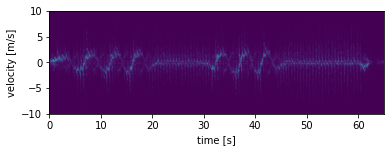

In [10]:
data = main()

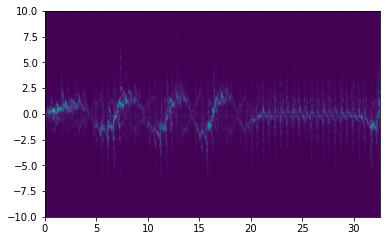

In [12]:
import matplotlib.pyplot as plt
num_doppler_bins = data.shape[0]
rbins = data.shape[1]//2
plt.imshow(data[:,:rbins], extent=[0, rbins/fps, -max_velocity, max_velocity])
plt.ylabel('velocity [m/s]')
plt.xlabel('time [s]')

save_file = '/mnt/c/work/rcube_extract/dca_capture/md_1.jpg'
plt.savefig(save_file, dpi=1000, bbox_inches = 'tight', pad_inches = 0.1)